In [28]:
 #Numerical libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
# to handle data in form of rows and columns 
import pandas as pd
# importing ploting libraries
from matplotlib import pyplot as plt
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns
from sklearn import metrics
import pandas as pd
# reading the CSV file into pandas dataframe
mydata = pd.read_csv(r'alsdata.csv')
#mydata = pd.read_csv(“alsdata.csv”)
mydata.drop('ID', axis=1, inplace=True)
mydata.drop('Urine.Ph_min', axis=1, inplace=True)

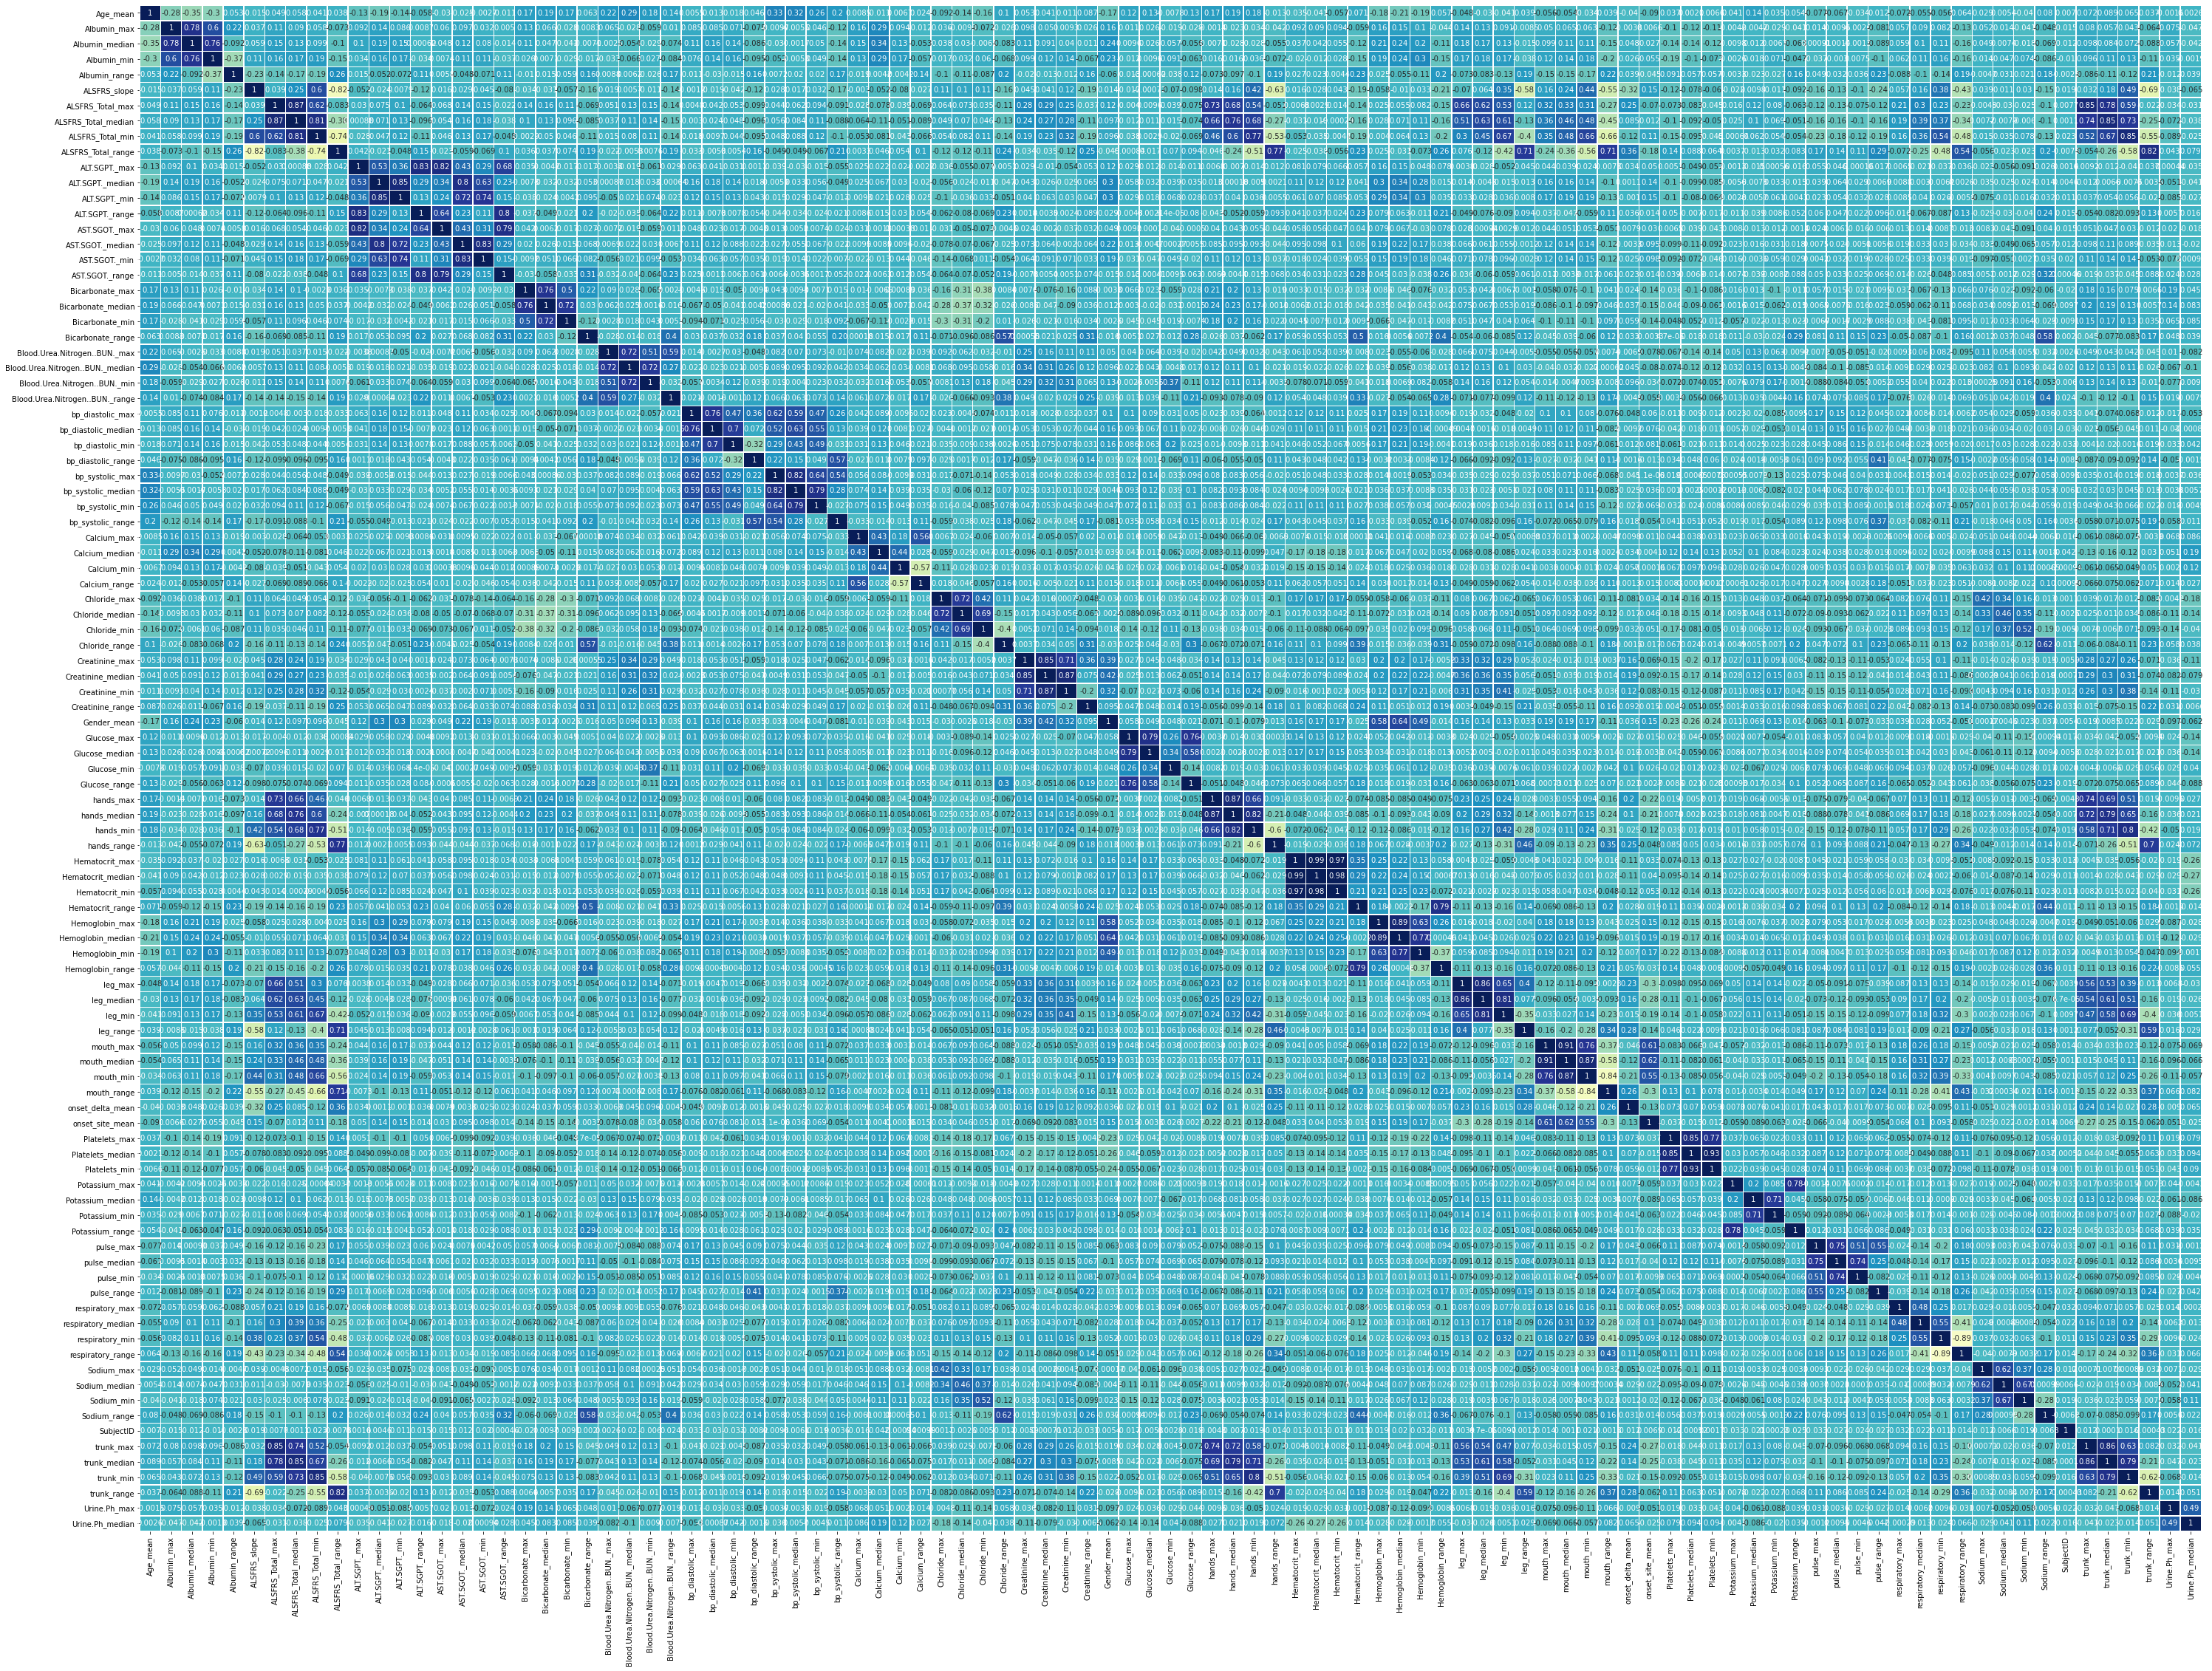

In [30]:
# — — — — — — — — — — — — — — — -Heat map to identify highly correlated variables — — — — — — — — — — — — -
#-------------------------------Heat map to identify highly correlated variables-------------------------
plt.figure(figsize=(50,28))
sns.heatmap(mydata.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [17]:
col_names=list(mydata.columns)
display(col_names)
for i in col_names:
 q1, q2, q3 = mydata[i].quantile([0.25,0.5,0.75])
 IQR = q3 - q1
 lower_cap=q1-1.5*IQR
 upper_cap=q3+1.5*IQR
 mydata[i]=mydata[i].apply(lambda x: upper_cap if x>(upper_cap) else (lower_cap if x<(lower_cap) else x))

['Age_mean',
 'Albumin_max',
 'Albumin_median',
 'Albumin_min',
 'Albumin_range',
 'ALSFRS_slope',
 'ALSFRS_Total_max',
 'ALSFRS_Total_median',
 'ALSFRS_Total_min',
 'ALSFRS_Total_range',
 'ALT.SGPT._max',
 'ALT.SGPT._median',
 'ALT.SGPT._min',
 'ALT.SGPT._range',
 'AST.SGOT._max',
 'AST.SGOT._median',
 'AST.SGOT._min',
 'AST.SGOT._range',
 'Bicarbonate_max',
 'Bicarbonate_median',
 'Bicarbonate_min',
 'Bicarbonate_range',
 'Blood.Urea.Nitrogen..BUN._max',
 'Blood.Urea.Nitrogen..BUN._median',
 'Blood.Urea.Nitrogen..BUN._min',
 'Blood.Urea.Nitrogen..BUN._range',
 'bp_diastolic_max',
 'bp_diastolic_median',
 'bp_diastolic_min',
 'bp_diastolic_range',
 'bp_systolic_max',
 'bp_systolic_median',
 'bp_systolic_min',
 'bp_systolic_range',
 'Calcium_max',
 'Calcium_median',
 'Calcium_min',
 'Calcium_range',
 'Chloride_max',
 'Chloride_median',
 'Chloride_min',
 'Chloride_range',
 'Creatinine_max',
 'Creatinine_median',
 'Creatinine_min',
 'Creatinine_range',
 'Gender_mean',
 'Glucose_max',
 'G

In [22]:
##Scale the data
from scipy.stats import zscore
mydata_z = mydata.apply(zscore)
mydata_z.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median
0,0.917137,3.089417,-1.300781,-0.866550,5.480929,-0.381450,-0.318520,0.134960,0.247368,-0.301588,...,2.992342,2.300470,0.260968,-1.719279,1.028018,0.981832,1.715365,-0.997420,-0.880376,0.463054
1,-0.574879,-0.622016,-1.112401,-0.553303,-0.347725,-0.310907,0.998995,0.888863,0.130839,0.166537,...,-1.198812,-0.278144,-0.489913,-1.718879,1.028018,0.981832,0.867032,-0.388669,0.192665,-1.137208
2,-1.452535,0.924415,1.148162,1.326179,-0.507103,-0.299769,-1.447819,-1.975969,-1.150976,-0.064100,...,1.595291,1.195350,-0.654169,-1.716861,-0.688950,-2.280669,-1.253800,0.398249,-0.880376,-1.137208
3,0.741606,-0.003443,0.017880,0.073191,-0.174361,0.208801,-0.318520,0.285741,0.480425,-0.685524,...,-0.639992,0.458603,-0.272701,-1.712520,-0.688950,0.049689,0.018699,-0.477181,0.192665,0.463054
4,0.741606,-0.003443,0.583021,0.386438,-0.573670,0.456831,0.057913,0.059570,0.014311,-0.350529,...,-0.081171,0.458603,-0.722774,-1.710920,-0.116627,-0.416383,-0.829634,0.300598,-0.880376,-1.137208


In [25]:
# List to store cluster and intra cluster distance
clusters = []
inertia_vals = []
# Since creating one cluster is similar to observing the data as a whole, multiple values of K are utilized to come up with the optimum cluster value
#Note: Cluster number and intra cluster distance is appended for plotting the elbow curve
for k in range(1, 10, 1):
    
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=7)
    model.fit(mydata_z)
# append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

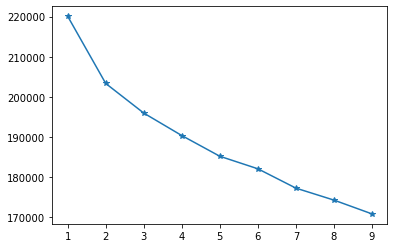

In [26]:
# plot the inertia vs K values
plt.plot(range(1,10,1),inertia_vals,marker='*')
plt.show()

---------------------------------------
KMeans(n_clusters=2, random_state=7)
Silhouette score: 0.07874908845688394
---------------------------------------
KMeans(n_clusters=3, random_state=7)
Silhouette score: 0.0690394830654853
---------------------------------------
KMeans(n_clusters=4, random_state=7)
Silhouette score: 0.07016023328768643
---------------------------------------
KMeans(n_clusters=5, random_state=7)
Silhouette score: 0.07458776217775444
---------------------------------------
KMeans(n_clusters=6, random_state=7)
Silhouette score: 0.04238811773318333
---------------------------------------
KMeans(n_clusters=7, random_state=7)
Silhouette score: 0.04786905378859099
---------------------------------------
KMeans(random_state=7)
Silhouette score: 0.04908563977606673
---------------------------------------
KMeans(n_clusters=9, random_state=7)
Silhouette score: 0.05055599879663686


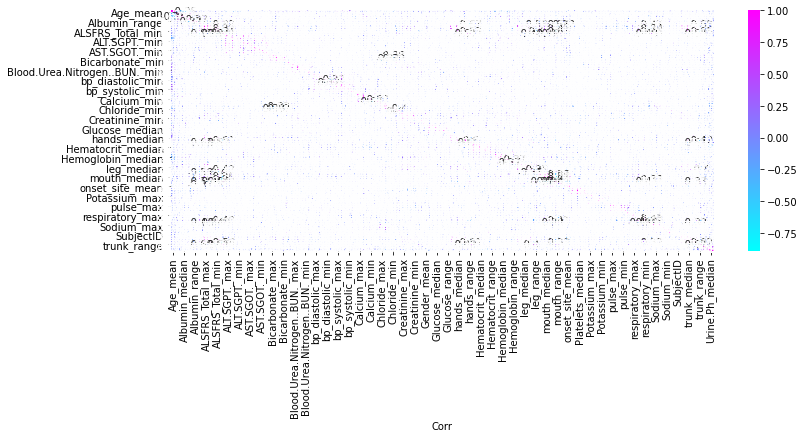

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
figure = plt.figure(figsize=(12, 6))
sns.heatmap(mydata.corr(), annot=True,cmap=plt.cm.cool)
plt.tight_layout()
plt.xlabel('Corr')
plt.show()